In [1]:
import os

import click
import numpy as np
import simulator
from networks import DentateGyrus
from scipy import stats  # type: ignore
from spikes import inhomogeneous_poisson_process
from neuron import gui
from recorders import VoltageRecorder, ActionPotentialRecorder

In [2]:
simulator.setup(seed=3)

DG = DentateGyrus()

n_connection_patterns = 24

In [9]:
temporal_patterns = [(inhomogeneous_poisson_process(t_start=0, t_stop=0.5, sampling_interval=0.001, rate_profile_frequency=10, rate_profile_amplitude=110) * 1000).round(1) for _ in range(n_connection_patterns)]

24 28 [ 30.1  41.1  44.6  55.3  59.4  60.4  61.7 126.1 127.8 128.2 133.  135.
 184.9 224.5 237.2 238.9 239.3 243.2 254.3 255.7 271.4 322.2 334.3 348.6
 363.2 411.4 431.6 440. ]


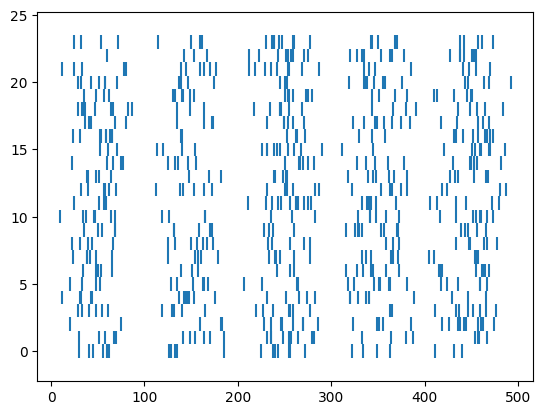

In [10]:
import matplotlib.pyplot as plt

print(len(temporal_patterns), len(temporal_patterns[0]), temporal_patterns[0])
plt.eventplot(temporal_patterns);

In [11]:
n_cells = len(DG.GCs.cells)
pdf = stats.norm.pdf(np.arange(n_cells), loc=n_cells/2, scale=n_cells/2)
pdf /= pdf.sum() # type: ignore

indeces = np.arange(n_cells)
centers = np.random.randint(0, n_cells, size=n_connection_patterns)

for i, center in enumerate(centers):
    relative = np.roll(indeces, -center)
    spatial_pattern = np.random.choice(relative, size=100, p=pdf, replace=False)
    DG.evoke_GC(temporal_patterns[i].tolist(), spatial_pattern.tolist(), weight=0.001)

In [12]:
n_cells = len(DG.BCs.cells)
pdf = stats.norm.pdf(np.arange(n_cells), loc=n_cells/2, scale=n_cells/2)
pdf /= pdf.sum() # type: ignore

indeces = np.arange(n_cells)
# centers = np.random.randint(0, n_cells, size=n_connection_patterns)
centers = (centers / len(DG.GCs.cells) * len(DG.BCs.cells)).astype(int)

for i, center in enumerate(centers):
    relative = np.roll(indeces, -center)
    spatial_pattern = np.random.choice(relative, size=1, p=pdf, replace=False)
    DG.evoke_BC(temporal_patterns[i].tolist(), spatial_pattern.tolist(), weight=0.001)

In [14]:
apr = ActionPotentialRecorder(DG)
vr = VoltageRecorder(DG)

In [15]:
simulator.run(warmup=200, duration=50)

In [16]:
len(apr.records_by_population_id[DG.MCs.id][0])

1

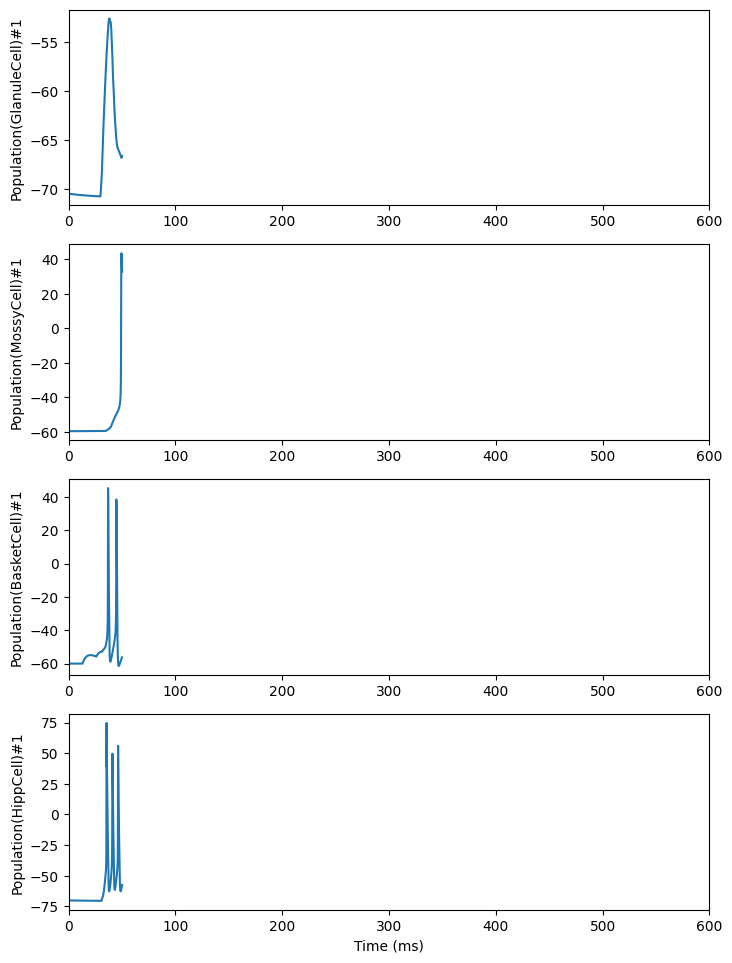

In [17]:
fig1 = vr.plot()

In [18]:
records = apr.records_by_population_id[DG.MCs.id]

def calc_active_cell_percentage(records: list):
        n_active_cells = 0
        for record in records:
            if len(record) > 0:
                n_active_cells += 1
        
        return n_active_cells / len(records) * 100

calc_active_cell_percentage(records)

40.0

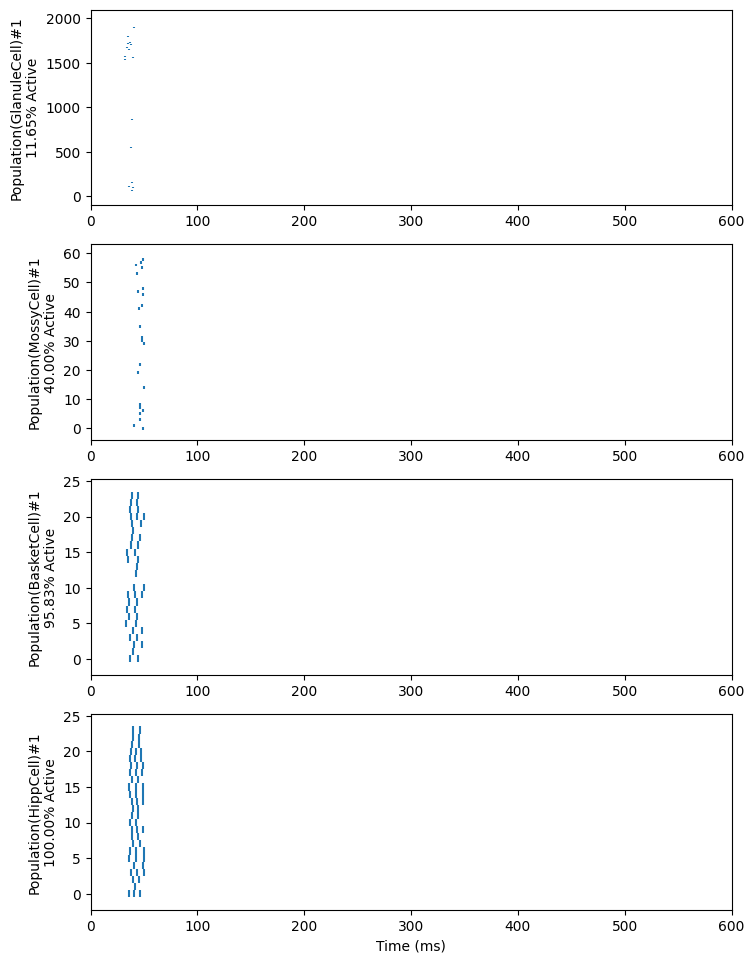

In [19]:
fig = apr.plot()